# K-Means Clustering
- Number of clusters pre-defined (parameter). 
- Property (as dataset) also predefined

In [1]:
# packages
import os
from datetime import datetime
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, Normalizer

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [41]:
def give_cluster_centers_and_plot_Kmeans(propertyId, clu_num, filter_zero_events = True, scale = True, normalize = "l2"):
    """
    Dataset engineering -> Kmeans Clustering -> Cluster Center Results
    """
    df = pd.read_csv(f"data/UnAppIt1_{propertyId}.csv", index_col = 0)
    if filter_zero_events:
        df = df[df.TimeDiff > 0]
        
    df["ImportantEvents"] = df.apply(lambda row: row['changeUrl'] + row["click"] + row["rightClick"], axis = 1)
    df_num = df.loc[:,["TimeDiff", "ImportantEvents"]]
    
    if scale:
        scalar = StandardScaler()
        scalar.fit(df_num)
        df_scale = pd.DataFrame(scalar.transform(df_num))

        kmeans = KMeans(init="random", n_clusters=5, n_init=4, random_state=0)
        kmeans.fit(df_scale)

        timeDiffMean = np.mean(df_num.TimeDiff)
        timeDiffStd = np.std(df_num.TimeDiff)
        importantEventsMean = np.mean(df_num.ImportantEvents)
        importantEventsStd = np.std(df_num.ImportantEvents)

        timeDiff = (df_scale[0] * timeDiffStd + timeDiffMean)
        importantEvents = (df_scale[1] * importantEventsStd + importantEventsMean)
        
        # cluster centers
        cluster_centers = pd.DataFrame({
        "SessionTimeCenter": kmeans.cluster_centers_[:,0] * timeDiffStd + timeDiffMean,
        "EventCountCenter" : kmeans.cluster_centers_[:,1] * importantEventsStd + importantEventsMean
        })
    else:
        normalizer = Normalizer(norm = normalize)
        normalizer.fit(df_num.to_numpy().transpose())
        df_norm = pd.DataFrame(normalizer.transform(df_num.to_numpy().transpose()).transpose())
    
        if normalize == "l2":
            timeDiffNorm = np.sqrt(np.sum(abs(df_num.TimeDiff)))
            importantEventsNorm = np.sqrt(np.sum(abs(df_num.ImportantEvents)))
            
            timeDiff = (df_norm[0] * timeDiffNorm)
            importantEvents = (df_norm[1] * importantEventsNorm)
        
        elif normalize == "l1":
            timeDiffNorm = np.linalg.norm(df_num.TimeDiff, ord = 1)
            importantEventsNorm = np.linalg.norm(df_num.ImportantEvents, ord = 1)
            
            timeDiff = (df_norm[0] * timeDiffNorm)
            importantEvents = (df_norm[1] * importantEventsNorm)
        
        elif normalize == "max":
            timeDiffNorm = np.linalg.norm(df_num.TimeDiff, ord = "inf")
            importantEventsNorm = np.linalg.norm(df_num.ImportantEvents, ord = "inf")
            
            timeDiff = (df_norm[0] * timeDiffNorm)
            importantEvents = (df_norm[1] * importantEventsNorm)
        else:
            raise "Norm not defined!"
        
        kmeans = KMeans(init="random", n_clusters=5, n_init=4, random_state=0)
        kmeans.fit(df_norm)
        
         # cluster centers
        cluster_centers = pd.DataFrame({
        "SessionTimeCenter": kmeans.cluster_centers_[:,0] * timeDiffNorm,
        "EventCountCenter" : kmeans.cluster_centers_[:,1] * importantEventsNorm
        })

        
    df_final = pd.DataFrame({
    "SessionTime": timeDiff,
    "EventCount": importantEvents,
    "ClusterLabel": kmeans.labels_
    })
    
    # plot
    plt.scatter(df_final["SessionTime"], df_final["EventCount"], c = df_final["ClusterLabel"],
           )
    plt.xlabel("SessionTime")
    plt.ylabel("EventCount")
    plt.show()
    
    return cluster_centers

              0         1
0      0.000007  0.000097
1      0.000258  0.000000
2      0.007423  0.001390
3      0.000351  0.001099
4      0.001183  0.000614
...         ...       ...
51509  0.002934  0.000000
51510  0.000025  0.000162
51511  0.000353  0.000000
51512  0.000003  0.000000
51513  0.000835  0.000097

[51514 rows x 2 columns]


<IPython.core.display.Javascript object>


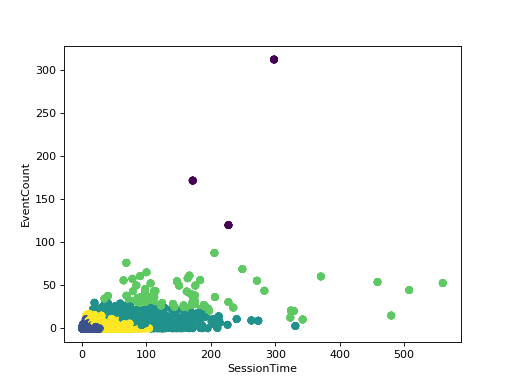

,SessionTimeCenter,EventCountCenter
0,229.241579,199.927113
1,7.834407,0.762350
2,98.073335,10.371996
3,172.285220,38.244726
4,44.317577,3.022269


In [42]:
give_cluster_centers_and_plot_Kmeans("31610", 5, scale = False, normalize = "l2")